In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

# EJEMPLO CON DATOS CONTROLADOS PARA PROBAR NUESTRA REGRESIÓN LINEAL SIMPLE

<Axes: >

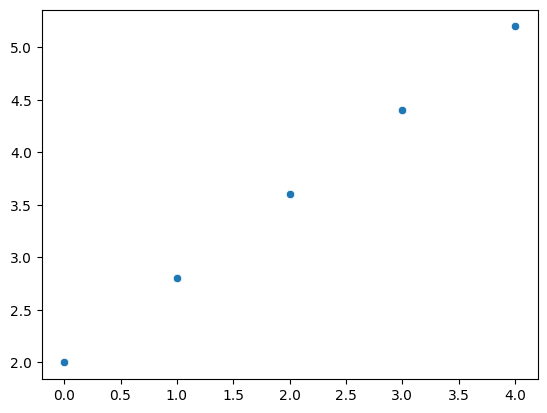

In [2]:
x = np.array([0,1,2,3,4])
y = np.array([2,2.8,3.6,4.4,5.2])
sns.scatterplot(x=x,y=y)

## CORRELACION

In [7]:
np.corrcoef(x,y)

array([[1., 1.],
       [1., 1.]])

## REGRESION LINEAL SIMPLE

In [4]:
result = scipy.stats.linregress(x,y)
result

LinregressResult(slope=0.8, intercept=2.0, rvalue=0.9999999999999999, pvalue=1.4044551538035188e-24, stderr=6.882551541204761e-09, intercept_stderr=1.6858739404357616e-08)

In [8]:
print(f'pendiente (slope) : {result.slope}')
print(f'intercepto(valor de y cuando x es 0) : {result.intercept}')
print(f'coeficiente de correlación (rvalue) : {result.rvalue}')

pendiente (slope) : 0.8
intercepto(valor de y cuando x es 0) : 2.0
coeficiente de correlación (rvalue) : 0.9999999999999999


𝑦
=
𝑚
𝑥
+
𝑏


donde:


1. m es la pendiente (slope)
2. b es el intercepto (intercept)
3. x es el valor nuevo para el cual quieres predecir

In [10]:
m = result.slope
b = result.intercept

HAGAMOS UNA PREDICCIÓN

In [11]:
x_new = 5

y_pred = m * x_new + b
print(f'cuando x = {x_new} : y = {y_pred}')

cuando x = 5 : y = 6.0


GRAFICAMOS NUESTRA REGRESIÓN LINEAL

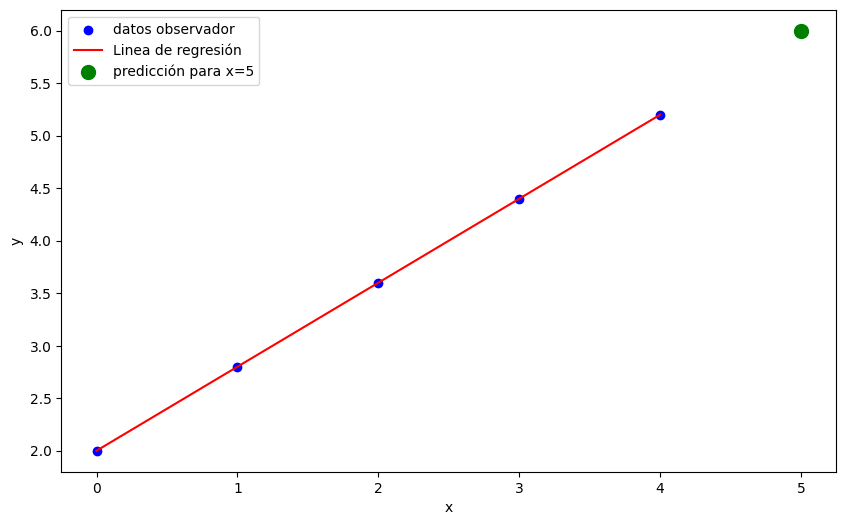

In [17]:
y_pred_x = m * x + b
plt.figure(figsize=(10,6))
plt.scatter(x,y,color='blue',label='datos observador')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,y_pred_x,color='red',label='Linea de regresión')
plt.scatter(x_new,y_pred,color='green',marker='o',s=100,label=f'predicción para x={x_new}')

plt.legend()
plt.show()

## REGRESION LINEAL SIMPLE CON DATASET DE PENGUINS

REGRESION LINEAL ENTRE EL FLIPPER_LENGHT_MM Y BODY_MASS_G

In [18]:
penguins_df = sns.load_dataset('penguins')
penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


REGRESIÓN LINEAL

In [19]:
penguins_res = scipy.stats.linregress(x=penguins_df.flipper_length_mm,y=penguins_df.body_mass_g)
penguins_res

LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan, intercept_stderr=nan)

QUITAMOS LOS NULOS

In [21]:
penguins_df.dropna(inplace=True)
penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [22]:
penguins_res = scipy.stats.linregress(x=penguins_df.flipper_length_mm,y=penguins_df.body_mass_g)
penguins_res

LinregressResult(slope=50.15326594224111, intercept=-5872.092682842823, rvalue=0.8729788985653613, pvalue=3.1328362509719978e-105, stderr=1.5402309838246344, intercept_stderr=310.2851553513498)

GRAFICAMOS LA REGRESIÓN LINEAL SIMPLE

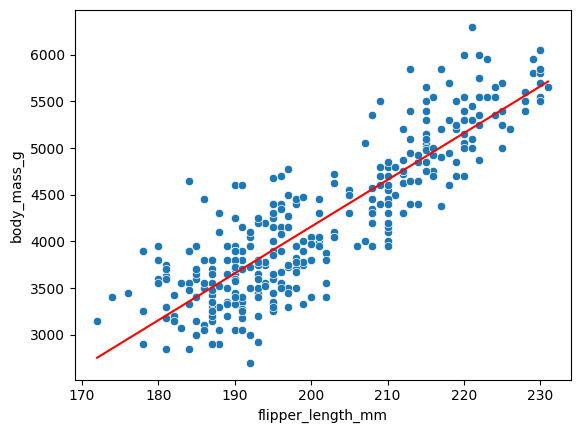

In [25]:
sns.scatterplot(
    data=penguins_df,
    x='flipper_length_mm',
    y='body_mass_g'
)

# y = mx + b

m = penguins_res.slope
b = penguins_res.intercept



fx_1 = np.array([penguins_df.flipper_length_mm.min(),penguins_df.flipper_length_mm.max()])
fy_1 = m * fx_1 + b

plt.plot(fx_1,fy_1,color='red')

OTRA FORMA DE GRAFICAR LA REGRESIÓN LINEAL CON SEABORN

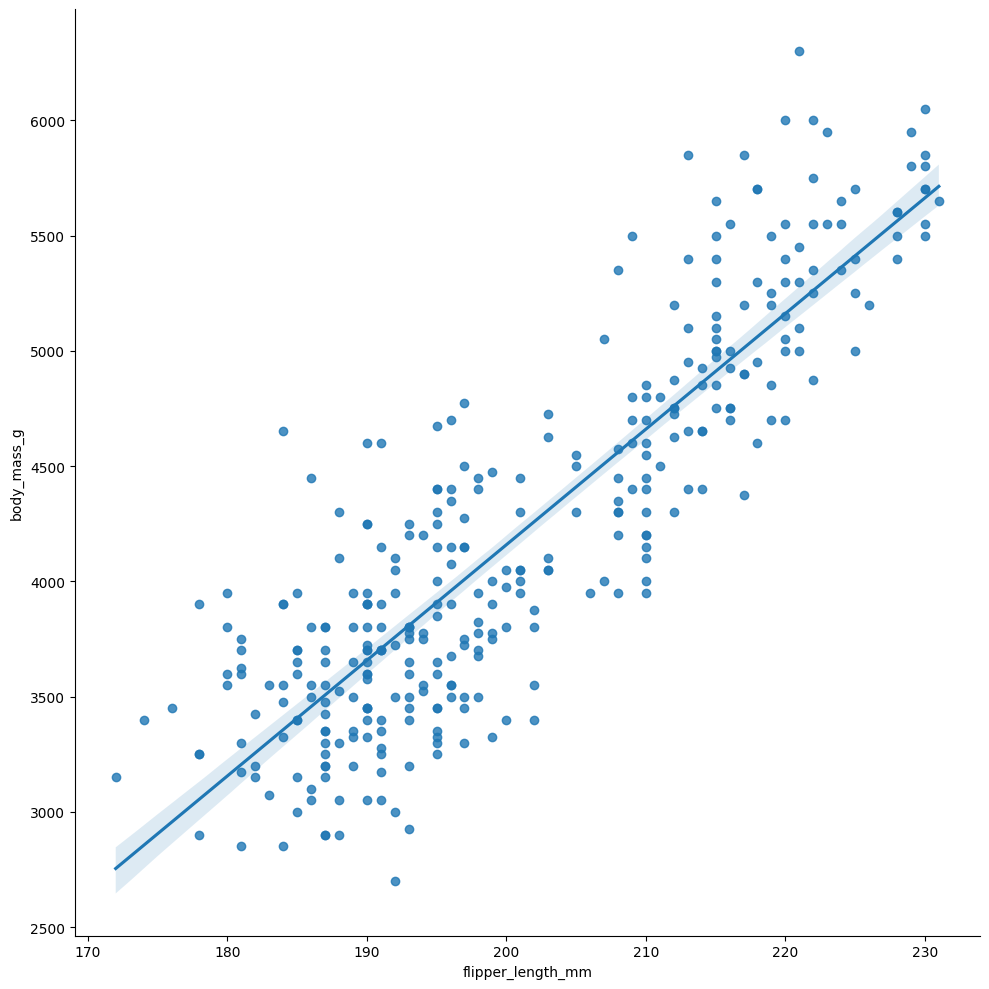

In [26]:
sns.lmplot(
    data=penguins_df,
    x='flipper_length_mm',
    y='body_mass_g',
    height=10
)